In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [1]:
#Khởi tạo các biến
data = [] #Khởi tạo kho lưu trữ dữ liệu ảnh
labels = [] #Khởi tạo kho lưu trữ các nhãn tương ứng với các ảnh
classes = 24 #Số lượng thư mục chứa các ảnh biển báo 
cur_path = os.getcwd() #Biến lưu trữ đường dẫn đến thư mục hiện tại

#Sử dụng vòng lặp để duyệt các thư mục ảnh
for i in range(classes):
    path = os.path.join(cur_path,'4loai',str(i))
    print (path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
           
            data.append(image) #Thêm ảnh đx duyệt qua vào data
            labels.append(i) #Thêm nhãn tương ứng với ảnh vào labels
        except:
            print('Load ảnh lỗi')

c:\Users\Admin\Downloads\archive\4loai\0
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh lỗi
Load ảnh l

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\Admin\\Downloads\\archive\\4loai\\6'

In [10]:
zipped_lists = zip(data, classes)
sorted_pairs =  sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data, labels = [ list(tuple) for tuple in tuples]

plt.Figure(figsize=(21,10))
plt.bar(data, classes)
plt.xticks(classes, rotation='vertical')
plt.show()

TypeError: 'int' object is not iterable

In [3]:
#Chuyển đổi thành các mảng
data = np. array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(28136, 30, 30, 3) (28136,)


In [4]:
#Tác tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state = 22)

#Chuẩn hoá dữ liệu thành 0-1 và được chuyển đổi thành float32
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#Hàm to_categorical sẽ tạo ra một vector, độ dài = số lượng classes, trong đó chỉ có 1 phần tử bằng 1 và các phần tử khác bằng 0
# Phần tử bằng 1 tại vị trí tương ứng với lớp của nhãn đó, còn  phần tử bằng 0 tại các vị trí khác

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [5]:
# Xây dựng mô hình

#Khởi tạo model
model = Sequential()
#Thêm 1 lớp tích chập + lớp Activatio: relu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten()) #Lớp duỗi
#Thêm 1 lớp Dense 256 + lớp Activatio: relu
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [6]:
#Hàm tối ưu cho model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Tăng cường dữ liệu
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32)
# Chạy mô hình
epochs = 30
history = model.fit(train_generator, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model9.h5")

Epoch 1/30
704/704 [==============================] - 74s 101ms/step - loss: 1.0580 - accuracy: 0.6769 - val_loss: 0.1089 - val_accuracy: 0.9726
Epoch 2/30
704/704 [==============================] - 123s 174ms/step - loss: 0.2251 - accuracy: 0.9350 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 3/30
704/704 [==============================] - 62s 88ms/step - loss: 0.1186 - accuracy: 0.9637 - val_loss: 0.0173 - val_accuracy: 0.9963
Epoch 4/30
704/704 [==============================] - 62s 88ms/step - loss: 0.0901 - accuracy: 0.9733 - val_loss: 0.0105 - val_accuracy: 0.9979
Epoch 5/30
704/704 [==============================] - 63s 89ms/step - loss: 0.0783 - accuracy: 0.9779 - val_loss: 0.0111 - val_accuracy: 0.9968
Epoch 6/30
704/704 [==============================] - 61s 86ms/step - loss: 0.0531 - accuracy: 0.9850 - val_loss: 0.0060 - val_accuracy: 0.9986
Epoch 7/30
704/704 [==============================] - 61s 87ms/step - loss: 0.0641 - accuracy: 0.9821 - val_loss: 0.0132 - val_accura

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


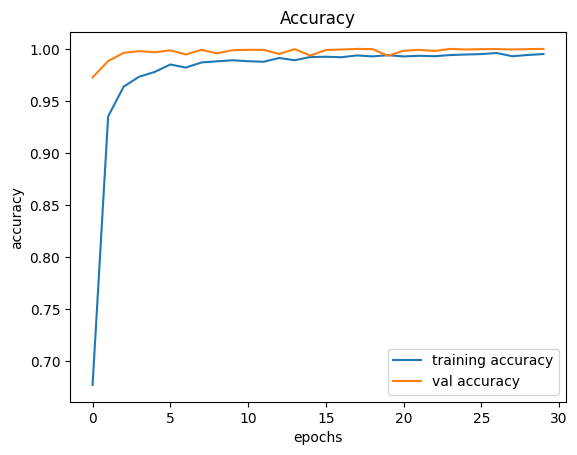

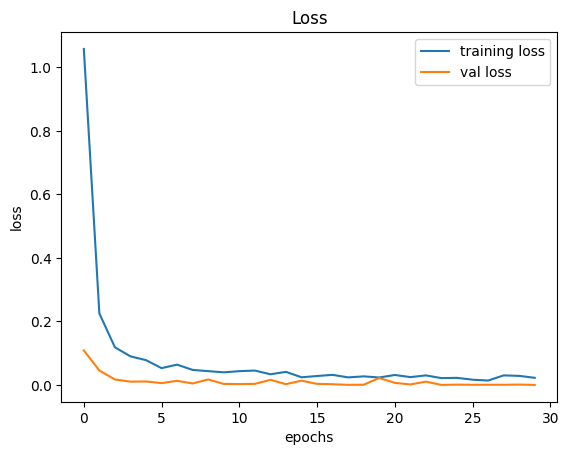

In [8]:
# Vẽ đồ thị cho độ chính xác

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

176/176 [==============================] - 3s 18ms/step - loss: 2.4589e-04 - accuracy: 1.0000
Accuracy:  1.0 
Loss    :  0.0002458922390360385
